# Color Counting Mondiran's Painting

#### Importing the libraries and the image

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.image import imread # or `from imageio import imread`
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Web link to Mondrian's painting
image = imread('https://www.iamexpat.nl/sites/default/files/styles/article--full/public/mondrian-painting.jpg?itok=cDpeCUbY',
               format='jpg') 

image.shape

(602, 1000, 3)

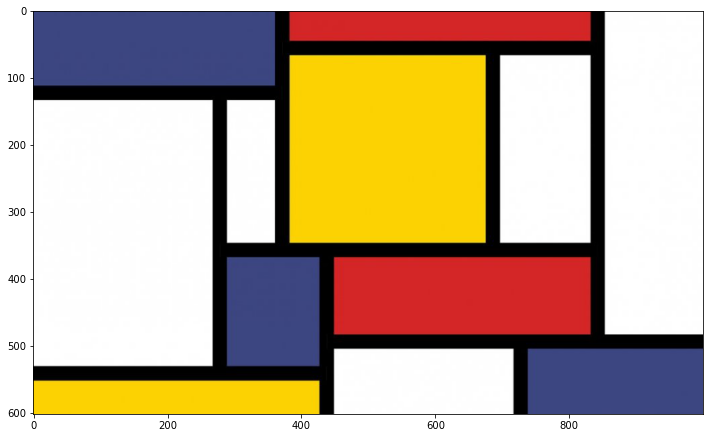

In [2]:
plt.figure(figsize=(12, 8))
plt.imshow(image)

#### Reshaping & Preprocessing

In [5]:
X = image.reshape(-1, 3)  # changes the (602, 1000, 3) size of the image to (602000, 3)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

#### K-Means Clustering

In [6]:
sse = [] #sum of squared error
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) #model.inertia_ provides sum of squared distances of samples to their closest cluster center.

#### Optimizing "K"

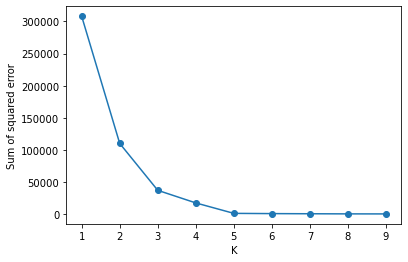

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse,marker='o')

#### The graph shows that sum of squared errors drastically drop when K reaches the value of 5. 
#### This is already a sign that the RGB colors in the image could be clustered to 5 groups, because the image is composed of 5 colors.
#### Let's fit the data with various values of k:

In [31]:
def clustering(k:int):
    kmeans = KMeans(init = "k-means++", n_clusters = k, n_init = 12).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)

    plt.figure(figsize=(10, 8))
    cluster_centers=kmeans.cluster_centers_.reshape(k,1,3)
    return(plt.imshow(segmented_img), cluster_centers, print('The array of the cluster centers: '))

The array of the cluster centers: 


(<matplotlib.image.AxesImage at 0x277d65f9748>,
 array([[[0.51331296, 0.34685879, 0.16560144]],
 
        [[0.99661273, 0.99661253, 0.99661058]]]),
 None)

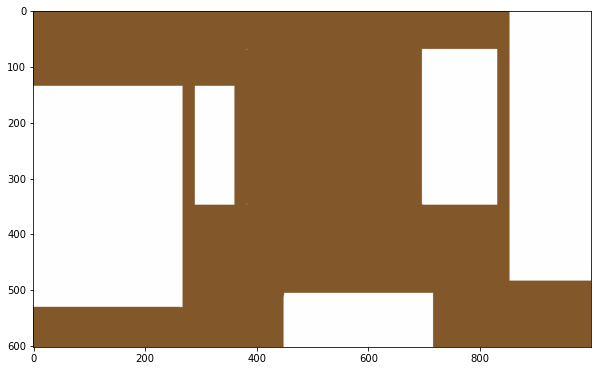

In [32]:
clustering(k=2)

The array of the cluster centers: 


(<matplotlib.image.AxesImage at 0x277d646e508>,
 array([[[0.99623574, 0.99623562, 0.99623465]],
 
        [[0.12610805, 0.14228319, 0.25756381]],
 
        [[0.98609999, 0.82289236, 0.01157129]],
 
        [[0.81932986, 0.15855545, 0.15528486]]]),
 None)

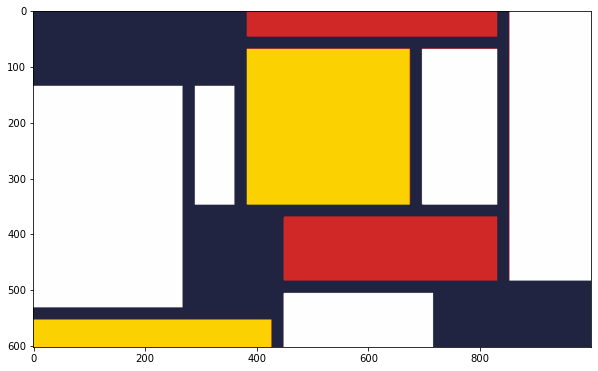

In [33]:
clustering(k=4)

The array of the cluster centers: 


(<matplotlib.image.AxesImage at 0x277d64a7488>,
 array([[[0.82190906, 0.15490357, 0.15160846]],
 
        [[0.9966497 , 0.99664958, 0.99664861]],
 
        [[0.98609999, 0.82289236, 0.01157129]],
 
        [[0.01316384, 0.00727253, 0.00891893]],
 
        [[0.23989759, 0.27726009, 0.50128497]]]),
 None)

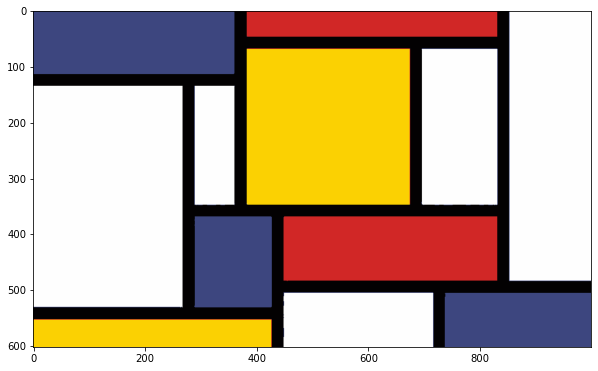

In [34]:
clustering(k=5)

#### Starting with k=2, only two color combinations in the RGB space are captured for the image. 
#### Yet, going to k=5, clearly can represent the most important aspects of the image.
#### Now, let's look at the exact colors that are detected in the 5 clusters:

The array of the cluster centers: 


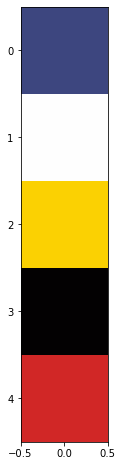

In [37]:
plt.imshow(clustering(5)[1])